In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file_name = 'DataCoSupplyChainDataset.csv'

# Read csv file into a dataframe
dataCo_data = pd.read_csv(file_name, encoding = "ISO-8859-1")

In [2]:
# Let's see the dataset
dataCo_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
# describe only for numerical, not categorical
dataCo_data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [4]:
### Select the variables you think will be valuable for our analysis.
dataCo_data = dataCo_data[['Type','Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 
                           'Sales per customer','Category Id', 'Customer Segment', 'Order Item Discount Rate', 
                          'Order Item Product Price','Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region',
                          'shipping date (DateOrders)', 'Shipping Mode']]
### Description for each column
# Type: Transaction, Days for shipping (real): Actual shipping days of the purchased product, 
# Days for shipment (scheduled): Days of scheduled delivery of the purchased product, 
# Benefit per order: Earnings per order placed, Sales per customer: Total sales per customer made per customer, 
# Category Id: Product category code, Customer Segment: Consumer , Corporate , Home Office
# Order Item Discount Rate': Order item discount percentage, Order Item Product Price: Price of products without discount
# Order Item Quantity: Number of products per order, Sales: Value in sales, Order Item Total: Total amount per order
# Order Profit Per Order, Order Region: Region of the world where the order is delivered, 
# shipping date (DateOrders): Exact date and time of shipment, Shipping Mode: Standard Class , First Class , Second Class , Same D.

dataCo_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Customer Segment,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,73,Consumer,0.04,327.75,1,327.75,314.640015,91.250000,Southeast Asia,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,73,Consumer,0.05,327.75,1,327.75,311.359985,-249.089996,South Asia,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,73,Consumer,0.06,327.75,1,327.75,309.720001,-247.779999,South Asia,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,73,Home Office,0.07,327.75,1,327.75,304.809998,22.860001,Oceania,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,73,Corporate,0.09,327.75,1,327.75,298.250000,134.210007,Oceania,1/15/2018 11:24,Standard Class


In [5]:
# Let's see if all values for 'Benefit per order' and 'Order Profit per Order' match:
benefit_Profit_comp = dataCo_data['Benefit per order'] == dataCo_data['Order Profit Per Order']
print(benefit_Profit_comp.values.all())  # They do. Let's drop Benefit per order.
dataCo_data = dataCo_data.drop(['Benefit per order'], axis = 1)

price_sales_comp = dataCo_data['Order Item Product Price'] == dataCo_data['Sales']
print(price_sales_comp.values.all()) # False. So let's keep both columns. 

True
False


Text(0, 0.5, 'Count')

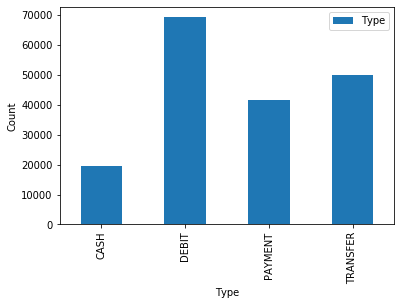

In [6]:
### Bar plot for Transaction Type
dataCo_data.groupby(['Type'])[['Type']].count().plot(kind='bar').set_ylabel('Count')

Text(0, 0.5, 'Count')

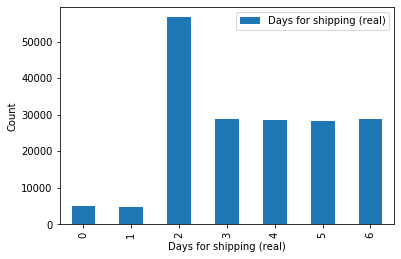

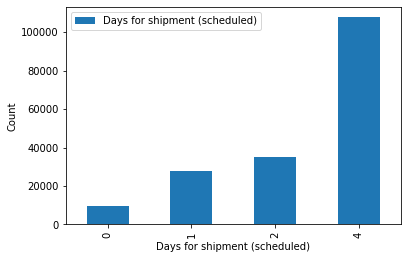

In [7]:
### Barplots for 'Days for Shipping Real' and 'Days for Shipping scheduled'
dataCo_data.groupby(['Days for shipping (real)'])[['Days for shipping (real)']].count().plot(kind='bar').set_ylabel('Count')
dataCo_data.groupby(['Days for shipment (scheduled)'])[['Days for shipment (scheduled)']].count().plot(kind='bar').set_ylabel('Count')

Text(0.5, 1.0, 'Example')

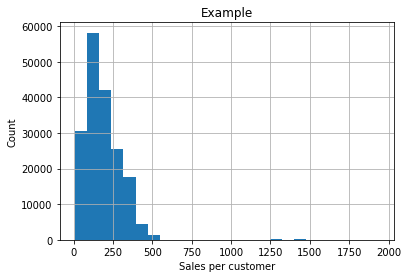

In [8]:
### Histogram for 'Sales per customer'
ax = dataCo_data['Sales per customer'].hist(bins = 25)
ax.set_ylabel('Count')
ax.set_xlabel('Sales per customer')
ax.set_title('Example')

Text(0, 0.5, 'Count')

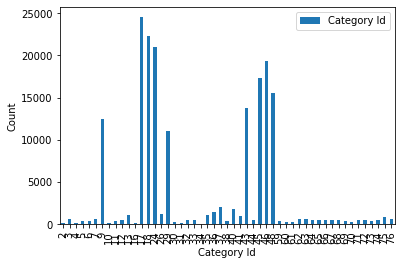

In [9]:
### Bar Plot for Category Id
dataCo_data.groupby(['Category Id'])[['Category Id']].count().plot(kind='bar').set_ylabel('Count')

Text(0, 0.5, 'Count')

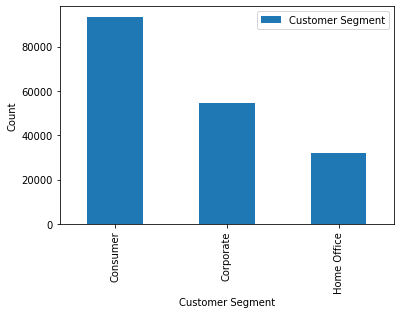

In [10]:
### Bar Plot for Customer Segment
dataCo_data.groupby(['Customer Segment'])[['Customer Segment']].count().plot(kind='bar').set_ylabel('Count')

Text(0.5, 1.0, 'Histogram for Discount Rates')

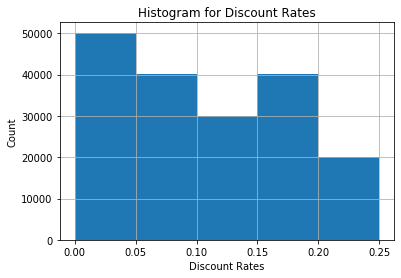

In [11]:
### Histogram for Order Item Discount Rate
ax = dataCo_data['Order Item Discount Rate'].hist(bins = 5)
ax.set_ylabel('Count')
ax.set_xlabel('Discount Rates')
ax.set_title('Histogram for Discount Rates')

Text(0.5, 1.0, 'Histogram for Product Price')

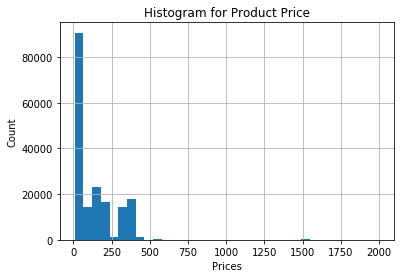

In [12]:
### Histogram for Order Item Product Price
ax = dataCo_data['Order Item Product Price'].hist(bins = 35)
ax.set_ylabel('Count')
ax.set_xlabel('Prices')
ax.set_title('Histogram for Product Price')

Text(0, 0.5, 'Count')

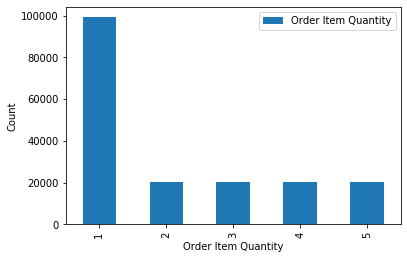

In [13]:
### Bar Plot for Order Item Quantity
dataCo_data.groupby(['Order Item Quantity'])[['Order Item Quantity']].count().plot(kind='bar').set_ylabel('Count')

Text(0.5, 1.0, 'Sales Prices')

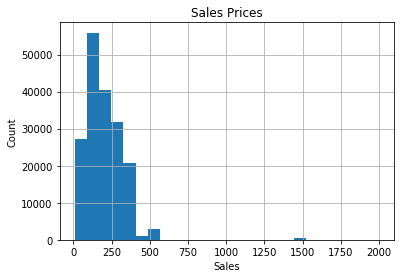

In [14]:
### Histogram for 'Sales'
ax = dataCo_data['Sales'].hist(bins = 25)
ax.set_ylabel('Count')
ax.set_xlabel('Sales')
ax.set_title('Sales Prices')

Text(0.5, 1.0, 'Item Price After Discount')

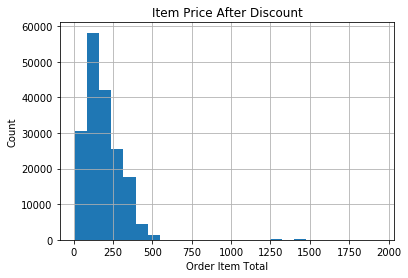

In [15]:
### Histogram for 'Order Item Total'
ax = dataCo_data['Order Item Total'].hist(bins = 25)
ax.set_ylabel('Count')
ax.set_xlabel('Order Item Total')
ax.set_title('Item Price After Discount')

Text(0.5, 1.0, 'Order Profit Per Order')

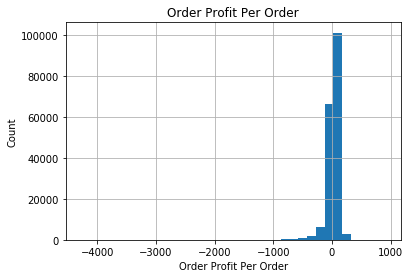

In [16]:
### Histogram for 'Order Item Total'
ax = dataCo_data['Order Profit Per Order'].hist(bins = 35)
ax.set_ylabel('Count')
ax.set_xlabel('Order Profit Per Order')
ax.set_title('Order Profit Per Order')

Text(0, 0.5, 'Count')

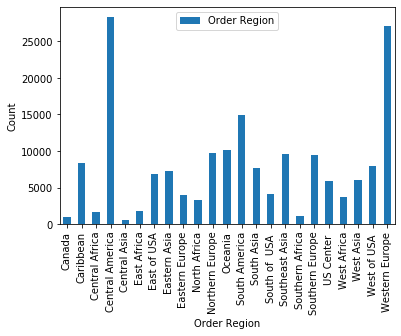

In [17]:
### Bar Plot for 'Order Region'
dataCo_data.groupby(['Order Region'])[['Order Region']].count().plot(kind='bar').set_ylabel('Count')

Text(0, 0.5, 'Count')

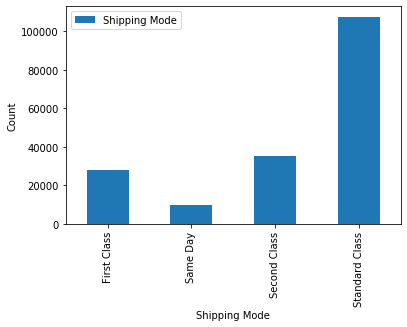

In [20]:
### Bar Plot for 'Shipping Mode'
dataCo_data.groupby(['Shipping Mode'])[['Shipping Mode']].count().plot(kind='bar').set_ylabel('Count')

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)